In [ ]:
def simulate_robots(lines, seconds=100, width=101, height=103):
    # Parse the input to get positions and velocities
    robots = []
    for line in lines:
        parts = line.split()
        px, py = map(int, parts[0][2:].split(","))
        vx, vy = map(int, parts[1][2:].split(","))
        robots.append({"pos": (px, py), "vel": (vx, vy)})

    # Simulate the movement for the given time
    for _ in range(seconds):
        for robot in robots:
            x, y = robot["pos"]
            vx, vy = robot["vel"]
            # Update positions and wrap around
            new_x = (x + vx) % width
            new_y = (y + vy) % height
            robot["pos"] = (new_x, new_y)

    # Initialize quadrants
    quadrant_counts = [0, 0, 0, 0]

    mid_x = width // 2
    mid_y = height // 2

    # Count robots in each quadrant
    for robot in robots:
        x, y = robot["pos"]
        if x != mid_x and y != mid_y:
            if x < mid_x and y < mid_y:
                quadrant_counts[0] += 1
            elif x >= mid_x and y < mid_y:
                quadrant_counts[1] += 1
            elif x < mid_x and y >= mid_y:
                quadrant_counts[2] += 1
            elif x >= mid_x and y >= mid_y:
                quadrant_counts[3] += 1

    # Calculate the safety factor
    safety_factor = (
        quadrant_counts[0]
        * quadrant_counts[1]
        * quadrant_counts[2]
        * quadrant_counts[3]
    )
    return safety_factor


# Example input
with open("./data/Day 14/example.txt", "r") as file:
    input_lines = file.read().splitlines()

# Calculate the safety factor
result = simulate_robots(input_lines, width=11, height=7)
print("Safety Factor:", result)

Christmas tree pattern detected at 7603 seconds.


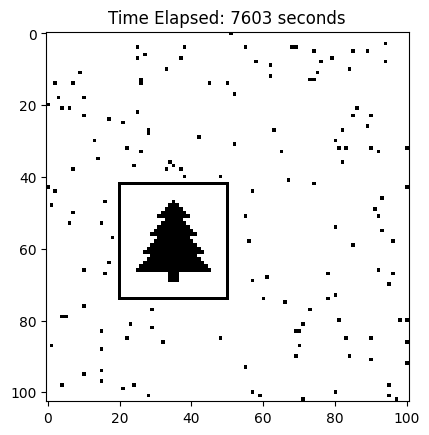

Seconds until Christmas tree: 7603


In [1]:
import matplotlib.pyplot as plt
import numpy as np


def simulate_until_pattern(lines, width=101, height=103):
    # Parse the input into positions and velocities.
    robots = []
    for line in lines:
        parts = line.split()
        px, py = map(int, parts[0][2:].split(","))
        vx, vy = map(int, parts[1][2:].split(","))
        robots.append({"pos": (px, py), "vel": (vx, vy)})

    seconds_elapsed = 0
    christmas_tree_found = False

    while not(christmas_tree_found):
        # Update the positions of the robots.
        for robot in robots:
            x, y = robot["pos"]
            vx, vy = robot["vel"]
            new_x = (x + vx) % width
            new_y = (y + vy) % height
            robot["pos"] = (new_x, new_y)

        # Increment time.
        seconds_elapsed += 1

        # Check if a Christmas tree pattern is detected.
        if detect_christmas_tree(robots, width, height):
            print(f"Christmas tree pattern detected at {seconds_elapsed} seconds.")
            plot_positions(robots, width, height, seconds_elapsed)
            christmas_tree_found = True

    return seconds_elapsed


def plot_positions(robots, width, height, seconds_elapsed):
    grid = np.zeros((height, width), dtype=int)

    for robot in robots:
        x, y = robot["pos"]
        grid[y, x] = 1

    plt.imshow(grid, cmap="Greys", origin="upper")
    plt.title(f"Time Elapsed: {seconds_elapsed} seconds")
    plt.show()


def detect_christmas_tree(robots, width, height):
    # Initialize a grid with robot positions.
    grid = np.zeros((height, width), dtype=int)

    for robot in robots:
        x, y = robot["pos"]
        grid[y, x] = 1

    # Try finding a tree shape anywhere in the grid:
    for y in range(height - 5):
        for x in range(3, width - 3):
            if check_tree_shape(grid, x, y):
                return True

    return False


def check_tree_shape(grid, top_x, top_y):
    # Detect a triangular "tree" shape.
    tree_layers = [
        (0,),  # Top layer: single point
        (-1, 1),  # Second layer: expand 1 left and right
        (-2, 0, 2),  # Third layer
        (-3, -1, 1, 3),  # Fourth layer
        (-4, -2, 0, 2, 4),  # Fifth layer: broad base
    ]

    for dy, offsets in enumerate(tree_layers):
        tree_y = top_y + dy
        for offset in offsets:
            tree_x = top_x + offset
            if not (0 <= tree_y < len(grid) and 0 <= tree_x < len(grid[0])):
                return False
            if grid[tree_y][tree_x] == 0:
                return False
    return True


with open("./data/Day 14/input.txt", "r") as file:
    input_lines = file.read().splitlines()

result = simulate_until_pattern(input_lines)
print("Seconds until Christmas tree:", result)